# Spotify Data Analysis

In this notebook, I created graphs based on data from https://spotifycharts.com/regional for my final research project for Youth in the Middle East, a class taught by Professor <a href="https://nyuad.nyu.edu/en/academics/divisions/arts-and-humanities/faculty/laure-salma-assaf.html">Laure Assaf<a/>. 

After obtaining the top 200 songs listened on 3 countries(United Arab Emirates, Saudi Arabia, and Egypt) from spotify charts, I then used the spotipy library to get the musical genres of each song. I aggregated this data for all genres and was able to obtain a ranking for all the musical genres listened on each country respectively. This exploratory data anlysis was used to further explore the sociological notion of "musical subcultures" we learned in class.


In [1]:
!pip install spotipy

     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 153kB 32.1MB/s 
     |████████████████████████████████| 1.3MB 38.1MB/s 
     |████████████████████████████████| 296kB 35.5MB/s 
     |████████████████████████████████| 143kB 39.5MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
pd.options.display.max_colwidth = 200
uae_pd = pd.read_csv("regional-ae-weekly-latest.csv", header=1) 
print("    Top 10 Streamed Songs in the United Arab Emirates | April 22-29, 2021")
uae_pd.head(10)

    Top 10 Streamed Songs in the United Arab Emirates | April 22-29, 2021


,Position,Track Name,Artist,Streams,URL
0,1,MONTERO (Call Me By Your Name),Lil Nas X,78467,https://open.spotify.com/track/67BtfxlNbhBmCDR2L2l8qd
1,2,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,76818,https://open.spotify.com/track/4iJyoBOLtHqaGxP12qzhQI
2,3,Astronaut In The Ocean,Masked Wolf,59564,https://open.spotify.com/track/3VT8hOC5vuDXBsHrR53WFh
3,4,Kiss Me More (feat. SZA),Doja Cat,52471,https://open.spotify.com/track/748mdHapucXQri7IAO8yFK
4,5,Levitating (feat. DaBaby),Dua Lipa,48045,https://open.spotify.com/track/5nujrmhLynf4yMoMtj8AQF
5,6,Save Your Tears (with Ariana Grande) (Remix),The Weeknd,47119,https://open.spotify.com/track/37BZB0z9T8Xu7U3e65qxFy
6,7,RAPSTAR,Polo G,44794,https://open.spotify.com/track/43PGPuHIlVOc04jrZVh9L6
7,8,Leave The Door Open,Bruno Mars,44198,https://open.spotify.com/track/7MAibcTli4IisCtbHKrGMh
8,9,Heartbreak Anniversary,Giveon,43976,https://open.spotify.com/track/3FAJ6O0NOHQV8Mc5Ri6ENp
9,10,Runaway,AURORA,40330,https://open.spotify.com/track/1v1oIWf2Xgh54kIWuKsDf6


In [3]:
print("    Top 10 Streamed Songs in Saudi Arabia | April 22-29, 2021")
sa_pd = pd.read_csv("regional-sa-weekly-latest.csv", header=1) 
sa_pd.head(10)

    Top 10 Streamed Songs in Saudi Arabia | April 22-29, 2021


,Position,Track Name,Artist,Streams,URL
0,1,ليه الجفا,Abdullah Al Farwan,101324,https://open.spotify.com/track/21redrQKfqom4LJarOQtQS
1,2,Astronaut In The Ocean,Masked Wolf,101041,https://open.spotify.com/track/3VT8hOC5vuDXBsHrR53WFh
2,3,Runaway,AURORA,91801,https://open.spotify.com/track/1v1oIWf2Xgh54kIWuKsDf6
3,4,Wasl Al Mahabah,Mohammed Bin Grman,77097,https://open.spotify.com/track/6hdRHwO3HVpXqZKmmZQXbb
4,5,MONTERO (Call Me By Your Name),Lil Nas X,76349,https://open.spotify.com/track/67BtfxlNbhBmCDR2L2l8qd
5,6,اشكر جمالك,Abdullah Al Mukhles,62305,https://open.spotify.com/track/2gFZxR3Fur5t6fUzKgo7Y9
6,7,Sawb Al Riyadh,Mashael,61763,https://open.spotify.com/track/2zRFrCapormSMSKfWh7Hu4
7,8,شيلة طرب حماسية,غنوة,52270,https://open.spotify.com/track/67pgW0LyrChcjli8XyjT9U
8,9,Allah Ala The Allil,Omar Naghmet Wattar,49001,https://open.spotify.com/track/5ihud1HlQGEy2JaZgFCsFE
9,10,Arcade,Duncan Laurence,48336,https://open.spotify.com/track/1J14CdDAvBTE1AJYUOwl6C


In [9]:
print("    Top 10 Streamed Songs in Egypt | April 22-29, 2021")
eg_pd = pd.read_csv('regional-eg-weekly-latest.csv', header = 1)
eg_pd.head(10)

    Top 10 Streamed Songs in Egypt | April 22-29, 2021


,Position,Track Name,Artist,Streams,URL
0,1,أسياد الصوت,Wegz,84813,https://open.spotify.com/track/42nkGZLFa7PF2Hut7f7sxk
1,2,CTRL,Marwan Pablo,75630,https://open.spotify.com/track/2lj1RNDztkIsyzhAX2soEa
2,3,Ghaba,Marwan Pablo,62800,https://open.spotify.com/track/4Zpg4neFtdTJJF4wsrTJRa
3,4,MONTERO (Call Me By Your Name),Lil Nas X,53912,https://open.spotify.com/track/67BtfxlNbhBmCDR2L2l8qd
4,5,Astronaut In The Ocean,Masked Wolf,46831,https://open.spotify.com/track/3VT8hOC5vuDXBsHrR53WFh
5,6,Msh Fair,Wegz,38354,https://open.spotify.com/track/1JdRPaDFswfqCpAhBPKqUw
6,7,متغاظ عارفك يلا مننا متغاظ,Mostafa el Degwy,36823,https://open.spotify.com/track/0sRMA5RMTncLpfZ6Uk9Wi1
7,8,Don,Marwan Pablo,36758,https://open.spotify.com/track/4bjdKuJEtkr8IEwBiqyxAq
8,9,Runaway,AURORA,33769,https://open.spotify.com/track/1v1oIWf2Xgh54kIWuKsDf6
9,10,El Hob Fein,Marwan Pablo,32189,https://open.spotify.com/track/60Gq23sQOFobysukKlK6fb


# Spotify Ouath
- Connect to spotify api to get genres for each song by getting the genres associated with the artist that wrote the song.

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data

client_id = "151e6d6dedfb413cafbf4a9064755e0b"
client_secret = "c564ba6a8f5544a9b0cb3ef45b38f7d7"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API


# Get number of streams per genre in each country based on top 200 songs

In [6]:
# https://stackoverflow.com/questions/61624487/extract-artist-genre-and-song-release-date-using-spotipy
genres_streams_uae = {}
for index,row in uae_pd.iterrows():
  track = row['Track Name'] #chosen track
  artist = row['Artist']
  streams = row['Streams']
  #track search query
  # result = sp.search(q="artist:" + artist + " track:" + track, type="track") #search query

  result = sp.search(artist)
  track = result['tracks']['items'][0]
  artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
  artist_genres = artist['genres']

  # save streams 
  for genre in artist_genres:
    if genre not in genres_streams_uae:
      genres_streams_uae[genre] = streams
    else:
      genres_streams_uae[genre]+=streams


print(genres_streams_uae)

{'country rap': 91851, 'lgbtq+ hip hop': 91851, 'pop rap': 491017, 'queer country': 91851, 'canadian pop': 457002, 'pop': 1633911, 'post-teen pop': 586442, 'australian hip hop': 88592, 'dance pop': 701899, 'uk pop': 277009, 'canadian contemporary r&b': 207759, 'chicago rap': 74653, 'r&b': 96182, 'dutch pop': 28933, 'colombian pop': 28236, 'pop rock': 65610, 'rap': 321093, 'slap house': 102997, 'house': 77266, 'pop dance': 168892, 'tropical house': 157982, 'uk dance': 53993, 'big room': 23273, 'brostep': 23273, 'dutch edm': 23273, 'edm': 120884, 'trance': 48032, 'cali rap': 47466, 'gauze pop': 22322, 'indietronica': 22322, 'shiver pop': 22322, 'k-pop': 58321, 'k-pop boy group': 50518, 'brooklyn drill': 85844, 'melodic rap': 123748, 'nyc rap': 53964, 'trap': 117999, 'bedroom soul': 18839, 'trap queen': 16527, 'acoustic opm': 16248, 'opm': 34005, 'german dance': 24759, 'german techno': 24759, 'german trance': 24759, 'pop house': 14791, 'modern alternative rock': 23461, 'modern rock': 6506

In [11]:
genres_streams_sa = {}
for index,row in sa_pd.iterrows():
  track = row['Track Name'] #chosen track
  artist = row['Artist']
  streams = row['Streams']
  #track search query
  # result = sp.search(q="artist:" + artist + " track:" + track, type="track") #search query

  result = sp.search(artist)
  track = result['tracks']['items'][0]
  artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
  artist_genres = artist['genres']

  # save streams 
  for genre in artist_genres:
    if genre not in genres_streams_sa:
      genres_streams_sa[genre] = streams
    else:
      genres_streams_sa[genre]+=streams


print(genres_streams_sa)

{'sheilat': 527738, 'australian hip hop': 111991, 'country rap': 94194, 'lgbtq+ hip hop': 94194, 'pop rap': 422135, 'queer country': 94194, 'khaliji': 496166, 'jalsat': 49001, 'dutch pop': 48336, 'dance pop': 378361, 'pop': 892795, 'uk pop': 167369, 'classic opm': 42335, 'opm': 42335, 'chicago rap': 78792, 'rap': 327380, 'canadian contemporary r&b': 138584, 'canadian pop': 234472, 'khaleeji iraqi': 168751, 'post-teen pop': 203937, 'colombian pop': 34210, 'cali rap': 38051, 'indonesian viral pop': 25181, 'gulf hip hop': 47588, 'nyc rap': 47473, 'r&b': 43810, 'trap': 102188, 'emo rap': 126479, 'sad rap': 41980, 'bass trap': 29328, 'gaming edm': 35051, 'traprun': 20998, 'k-pop': 50455, 'k-pop boy group': 40558, 'electropop': 115089, 'speedrun': 20138, 'video game music': 20138, 'australian dance': 29508, 'australian pop': 41960, 'north carolina hip hop': 19315, 'sudanese pop': 19141, 'slap house': 112759, 'alt z': 76578, 'alternative r&b': 29189, 'melodic rap': 111368, 'miami hip hop': 10

In [12]:
genres_streams_eg = {}
for index,row in eg_pd.iterrows():
  track = row['Track Name'] #chosen track
  artist = row['Artist']
  streams = row['Streams']
  #track search query
  # result = sp.search(q="artist:" + artist + " track:" + track, type="track") #search query

  result = sp.search(artist)
  track = result['tracks']['items'][0]
  artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
  artist_genres = artist['genres']

  # save streams 
  for genre in artist_genres:
    if genre not in genres_streams_eg:
      genres_streams_eg[genre] = streams
    else:
      genres_streams_eg[genre]+=streams


print(genres_streams_eg)

{'belgian contemporary classical': 318638, 'compositional ambient': 318638, 'minimalism': 318638, 'post-minimalism': 318638, 'egyptian hip hop': 967976, 'country rap': 63027, 'lgbtq+ hip hop': 63027, 'pop rap': 170464, 'queer country': 63027, 'australian hip hop': 46831, 'alternative rock': 24663, 'dance-punk': 24663, 'modern rock': 46355, 'rock': 38736, 'canadian pop': 93717, 'pop': 377192, 'post-teen pop': 88589, 'canadian contemporary r&b': 55557, 'dutch pop': 22990, 'dance pop': 145494, 'uk pop': 62119, 'mahraganat': 155848, 'arab pop': 154620, 'belly dance': 29007, 'egyptian pop': 324443, 'persian pop': 29007, 'rif': 29007, 'egyptian alternative': 83669, 'colombian pop': 16041, 'chicago rap': 23452, 'arab alternative': 49945, 'r&b': 13733, 'nyc rap': 28980, 'electropop': 71325, 'khaliji': 29450, 'shaabi': 38396, 'arabic hip hop': 12571, 'middle east hip hop': 12571, 'indonesian viral pop': 12563, 'desi pop': 12325, 'rap': 101422, 'slap house': 68371, 'trap': 19594, 'big room': 109

# Visualize Most listened musical genres in all countries

In [21]:
uae_music_genres_categories_pd = pd.DataFrame([genres_streams_uae[key] for key in genres_streams_uae],index = [key for key in genres_streams_uae], columns=["Number of Streams"])
uae_music_genres_categories_pd = uae_music_genres_categories_pd.sort_values(by=['Number of Streams'], ascending=False)
rankings = [x+1 for x in range(len(uae_music_genres_categories_pd.index))]
uae_music_genres_categories_pd.insert(0, "Ranking", rankings , True)

print("Top 10 Musical Genres listened in the United Arab Emirates | April 22-29, 2021")
uae_music_genres_categories_pd.head(10)

Top 10 Musical Genres listened in the United Arab Emirates | April 22-29, 2021


,Ranking,Number of Streams
pop,1,1633911
dance pop,2,701899
post-teen pop,3,586442
pop rap,4,491017
canadian pop,5,457002
rap,6,321093
uk pop,7,277009
canadian contemporary r&b,8,207759
pop dance,9,168892
tropical house,10,157982


In [22]:
sa_music_genres_categories_pd = pd.DataFrame([genres_streams_sa[key] for key in genres_streams_sa],index = [key for key in genres_streams_sa], columns=["Number of Streams"])
sa_music_genres_categories_pd = sa_music_genres_categories_pd.sort_values(by=['Number of Streams'], ascending=False)
rankings = [x+1 for x in range(len(sa_music_genres_categories_pd.index))]
sa_music_genres_categories_pd.insert(0, "Ranking", rankings , True)

print("Top 10 Musical Genres listened in Saudi Arabia | April 22-29, 2021")
sa_music_genres_categories_pd.head(10)

Top 10 Musical Genres listened in Saudi Arabia | April 22-29, 2021


,Ranking,Number of Streams
pop,1,892795
sheilat,2,527738
khaliji,3,496166
pop rap,4,422135
dance pop,5,378361
rap,6,327380
canadian pop,7,234472
post-teen pop,8,203937
khaleeji iraqi,9,168751
uk pop,10,167369


In [23]:
eg_music_genres_categories_pd = pd.DataFrame([genres_streams_eg[key] for key in genres_streams_eg],index = [key for key in genres_streams_eg], columns=["Number of Streams"])
eg_music_genres_categories_pd = eg_music_genres_categories_pd.sort_values(by=['Number of Streams'], ascending=False)
rankings = [x+1 for x in range(len(eg_music_genres_categories_pd.index))]
eg_music_genres_categories_pd.insert(0, "Ranking", rankings , True)

print("Top 10 Musical Genres listened in Egypt | April 22-29, 2021")


eg_music_genres_categories_pd.head(10)

Top 10 Musical Genres listened in Egypt | April 22-29, 2021


,Ranking,Number of Streams
egyptian hip hop,1,967976
pop,2,377192
egyptian pop,3,324443
belgian contemporary classical,4,318638
compositional ambient,5,318638
minimalism,6,318638
post-minimalism,7,318638
pop rap,8,170464
mahraganat,9,155848
arab pop,10,154620


# All Genres found

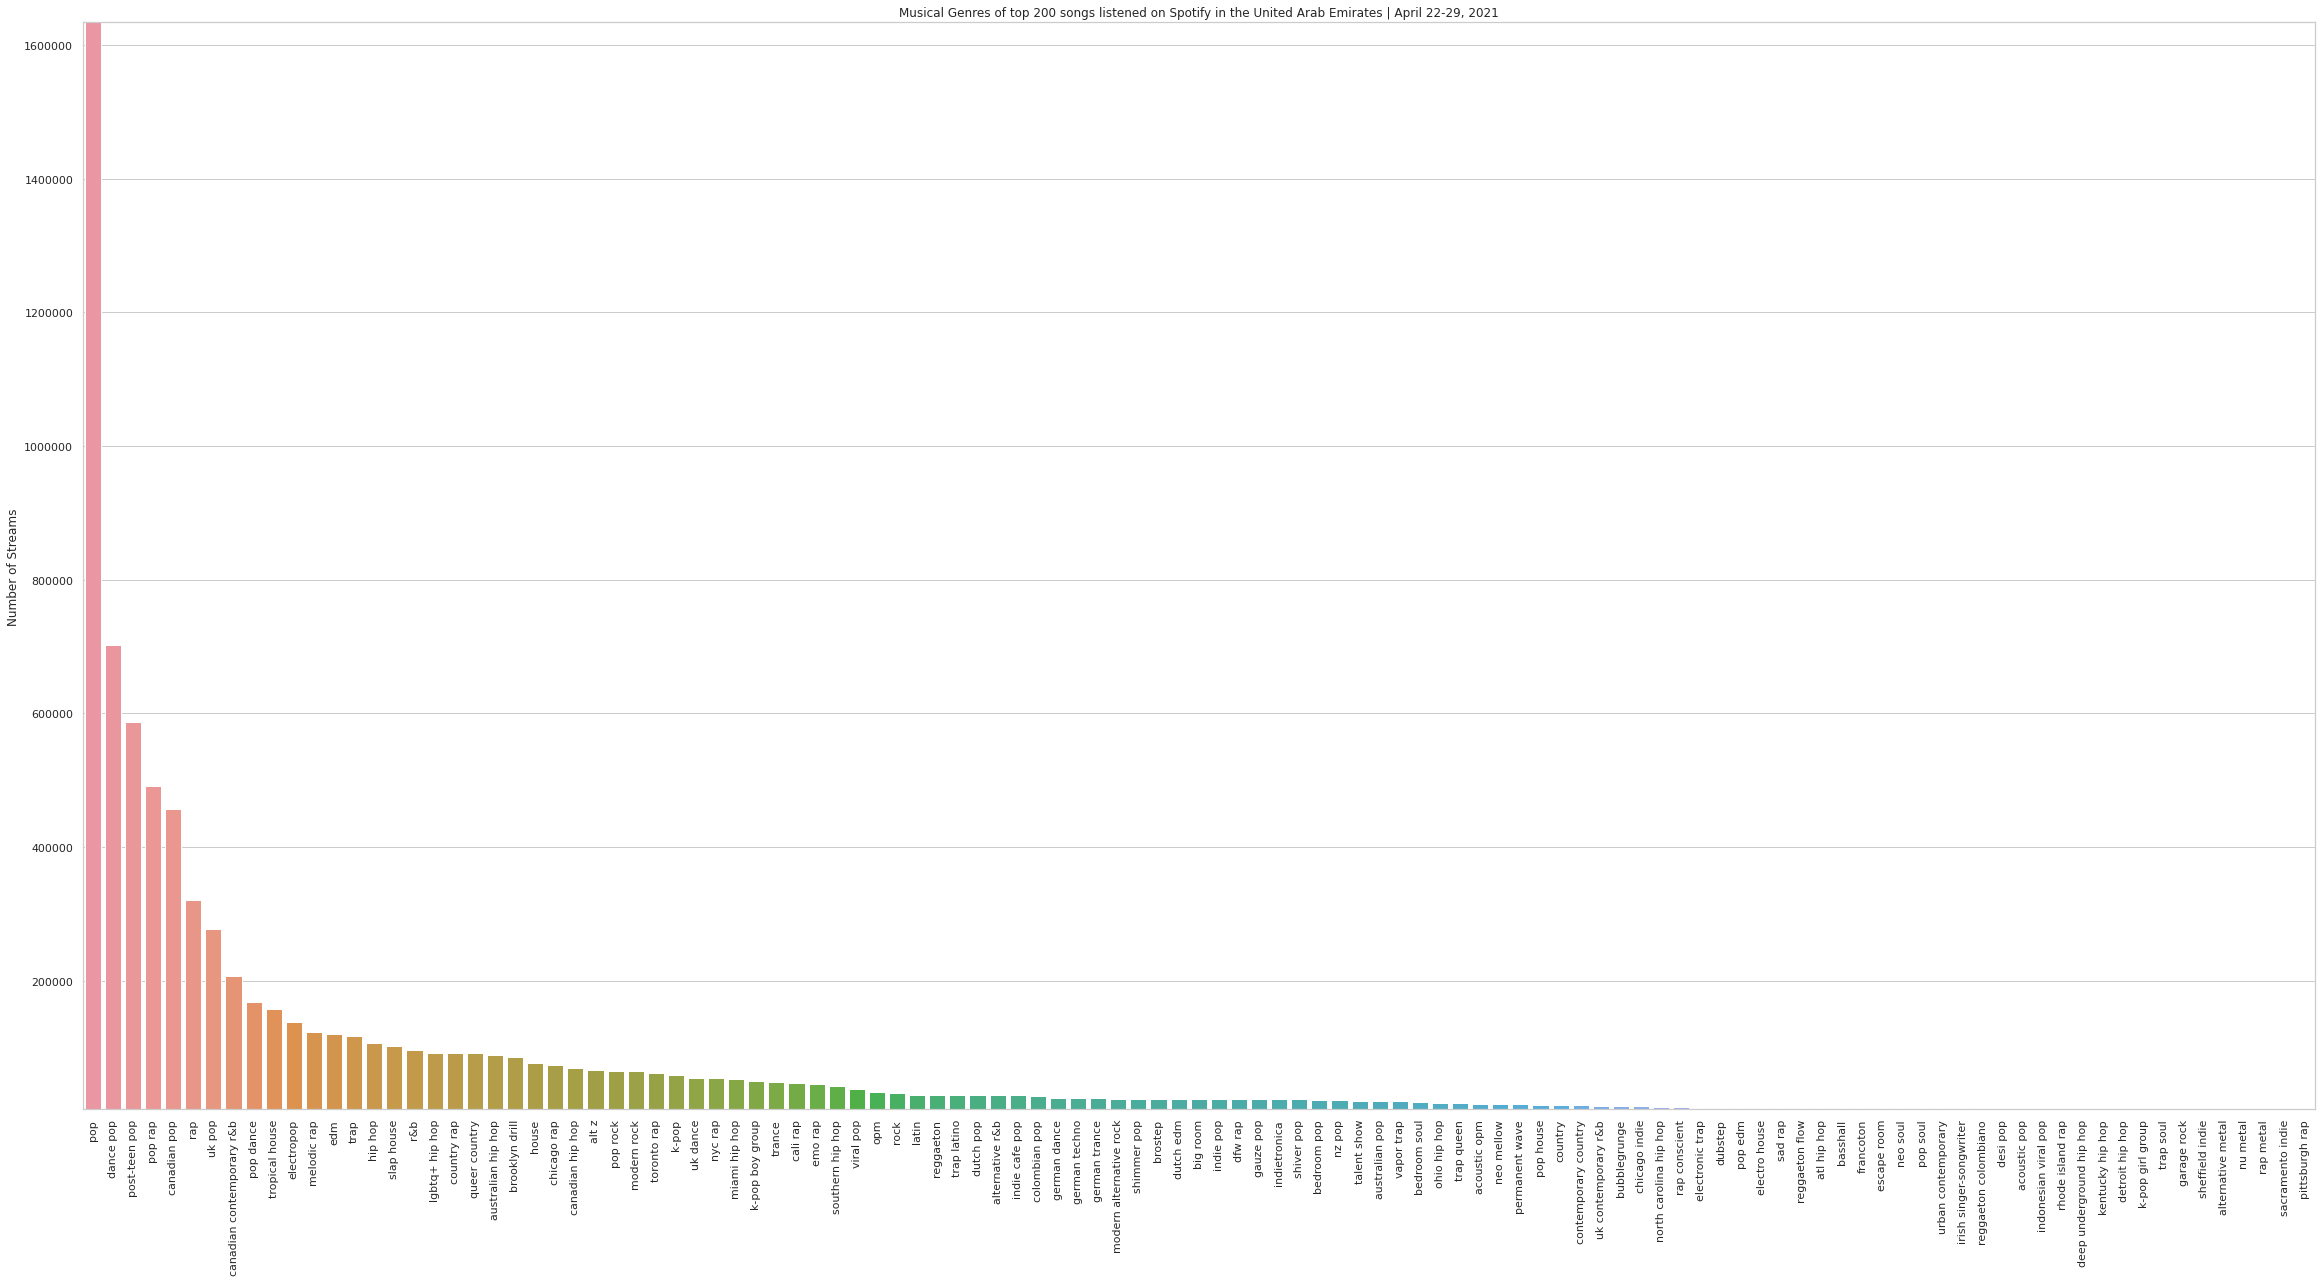

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt

graph_dims = (40, 20)

smallest_count = uae_music_genres_categories_pd.nsmallest(1, 'Number of Streams')['Number of Streams'].values[0]
largest_count = uae_music_genres_categories_pd.nlargest(1, 'Number of Streams')['Number of Streams'].values[0]
fig, ax = plt.subplots(figsize=graph_dims)
ax.set(ylim=(smallest_count,largest_count))
ax.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")
plot1 = sns.barplot(ax=ax,x=uae_music_genres_categories_pd.index, y=uae_music_genres_categories_pd['Number of Streams'])
plt.xticks(rotation=90)
plt.title('Musical Genres of top 200 songs listened on Spotify in the United Arab Emirates | April 22-29, 2021')
plt.savefig("uae_allgenres.png")

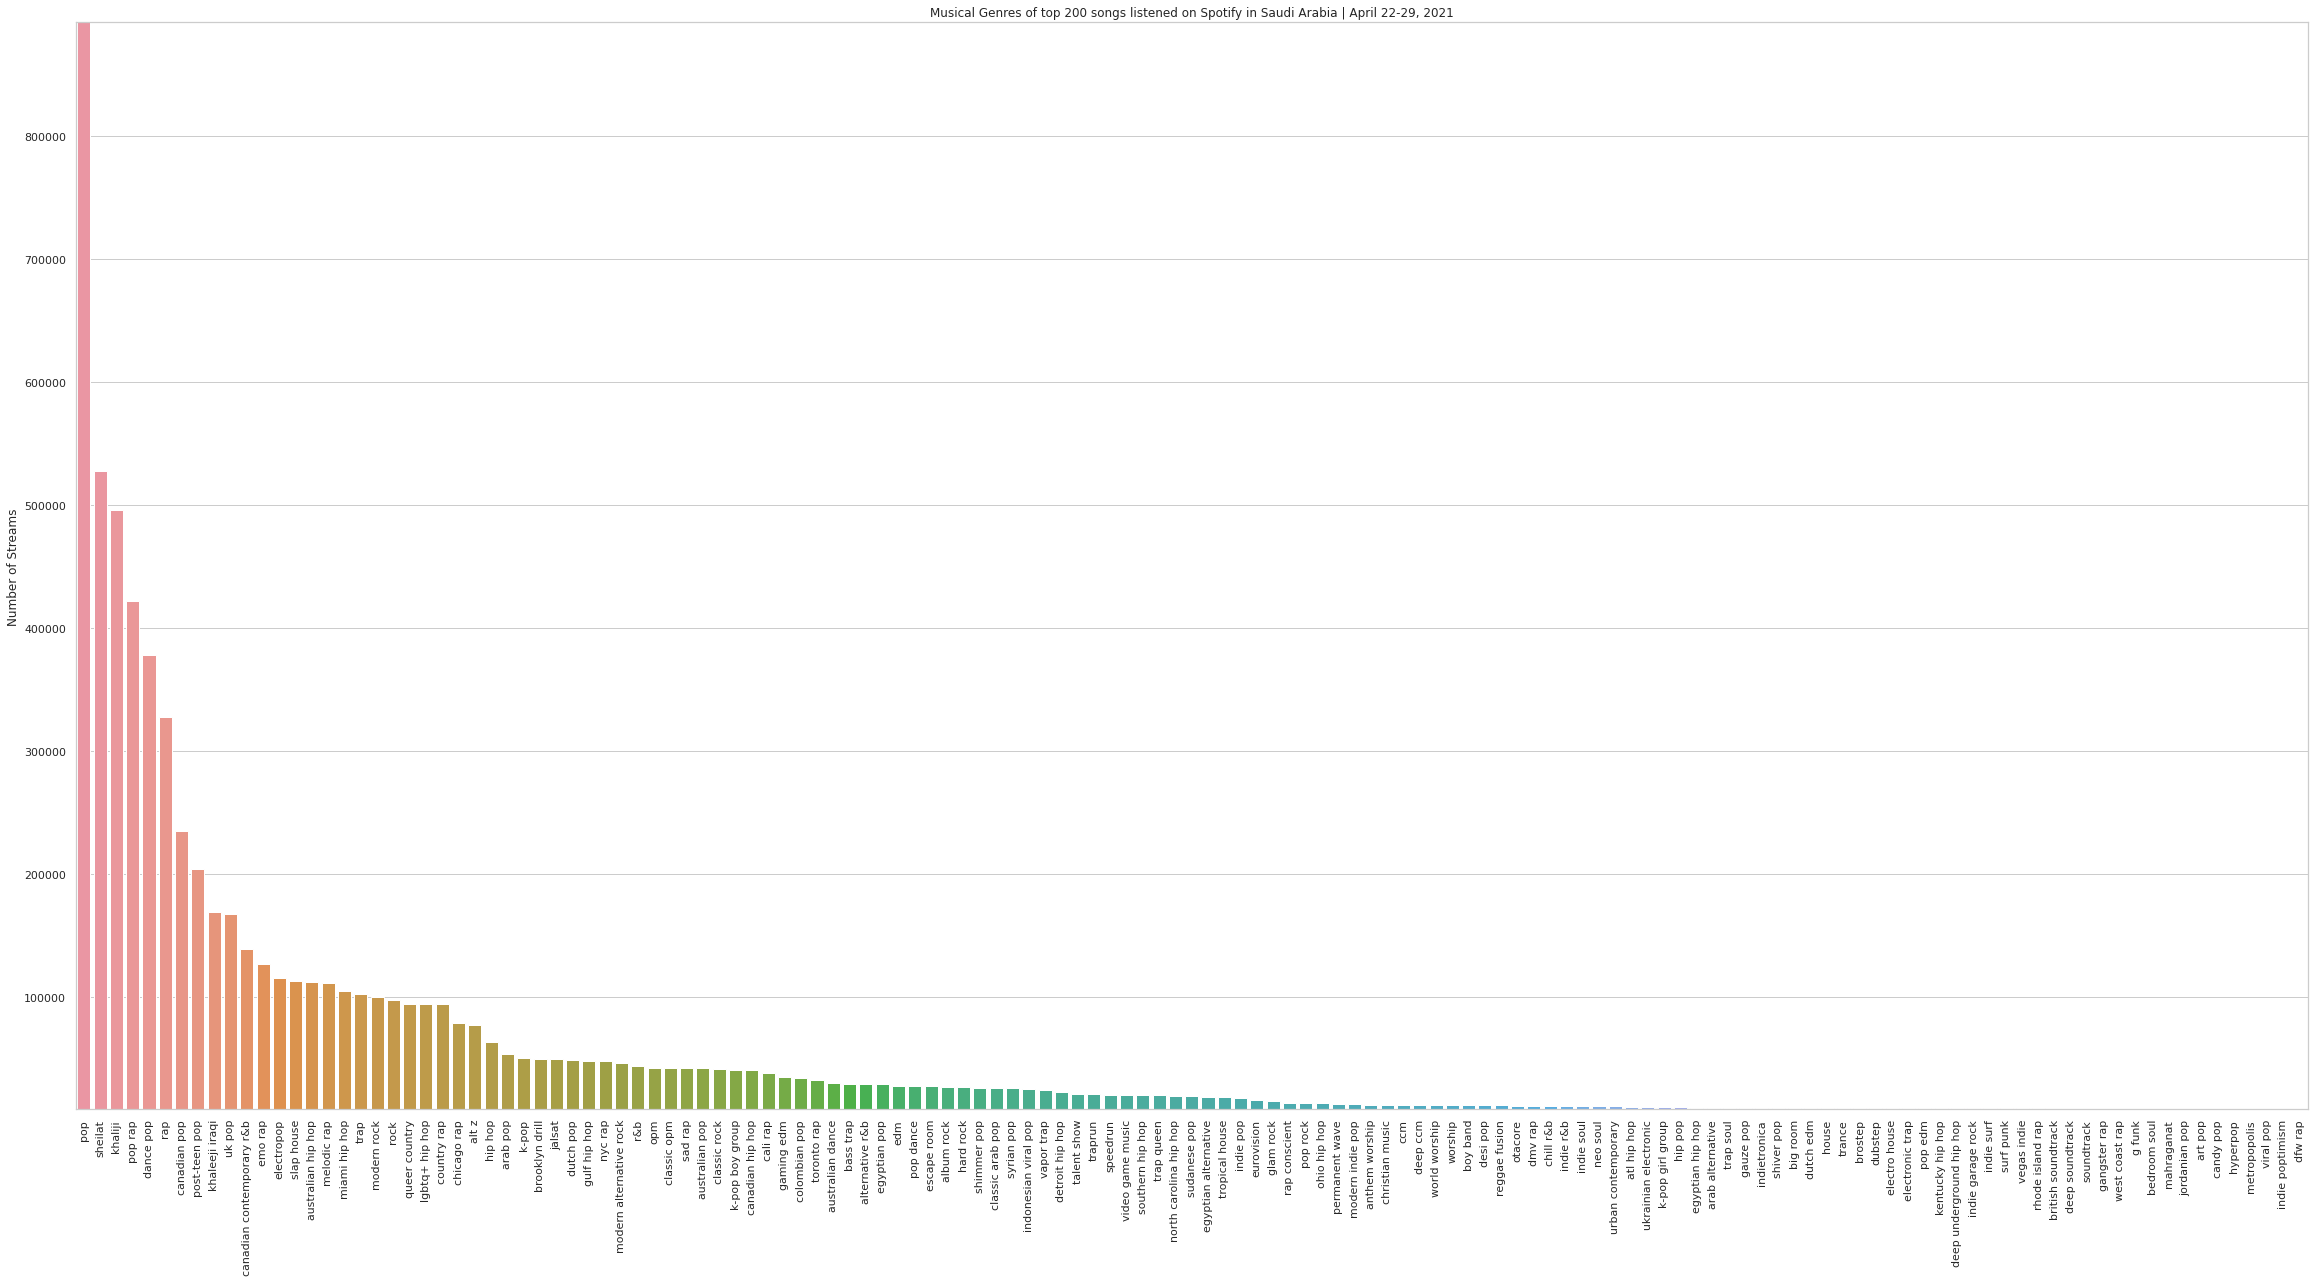

In [32]:
smallest_count = sa_music_genres_categories_pd.nsmallest(1, 'Number of Streams')['Number of Streams'].values[0]
largest_count = sa_music_genres_categories_pd.nlargest(1, 'Number of Streams')['Number of Streams'].values[0]
fig, ax = plt.subplots(figsize=graph_dims)
ax.set(ylim=(smallest_count,largest_count))
ax.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")
plot2 = sns.barplot(ax=ax,x=sa_music_genres_categories_pd.index, y=sa_music_genres_categories_pd['Number of Streams'])
plt.xticks(rotation=90)
plt.title('Musical Genres of top 200 songs listened on Spotify in Saudi Arabia | April 22-29, 2021')
plt.savefig("sa_allgenres.png")

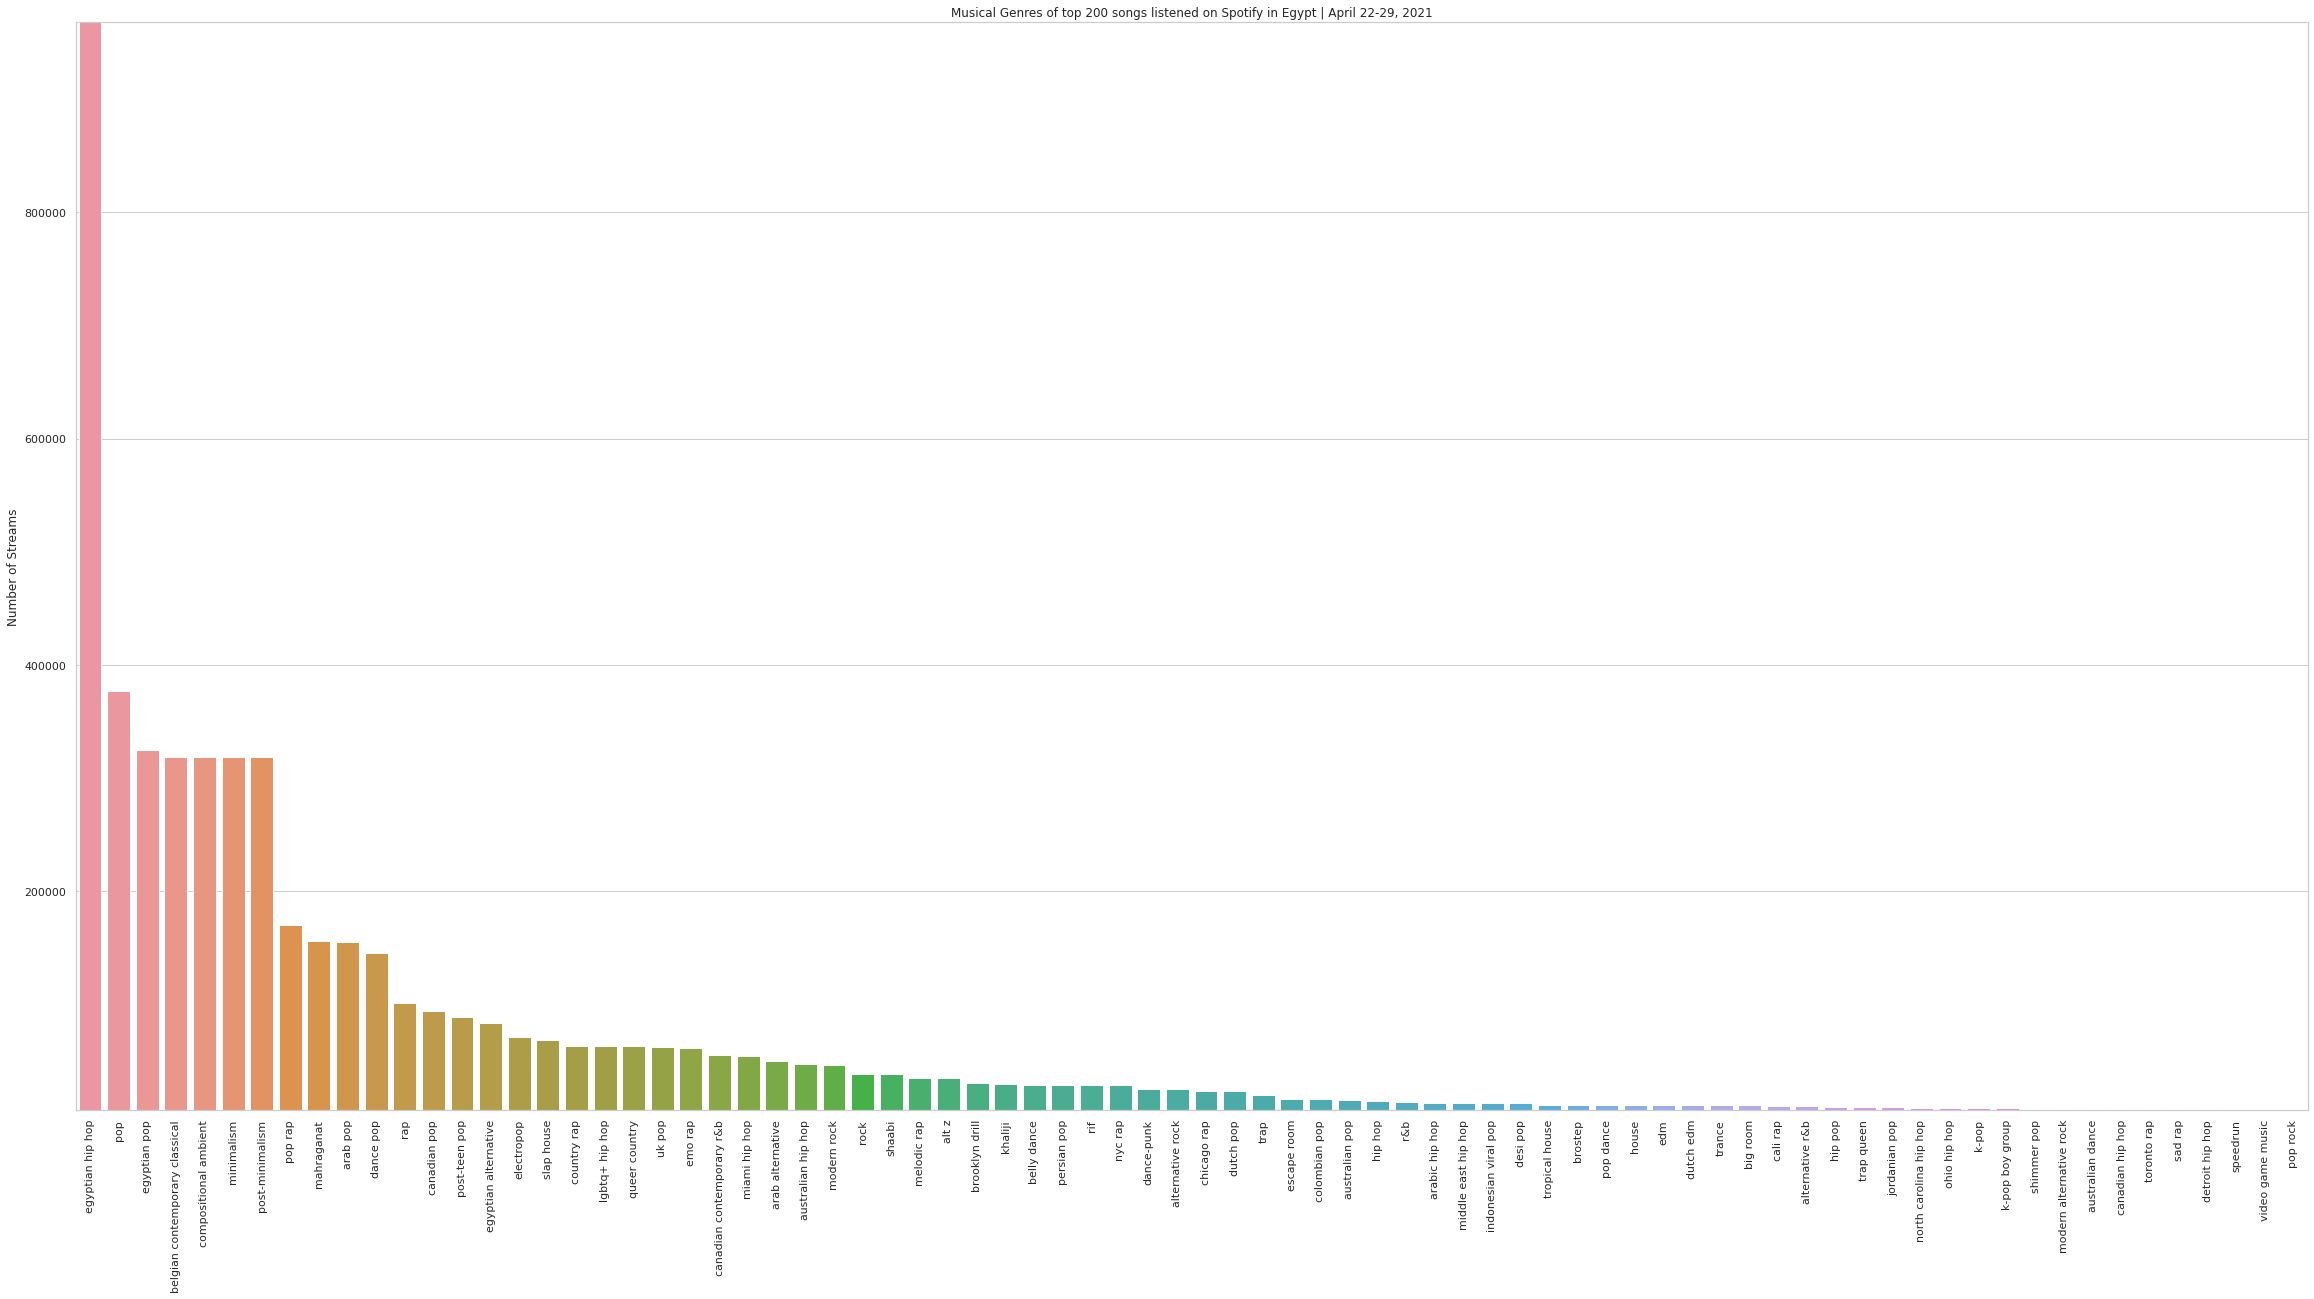

In [33]:
eg_music_genres_categories_pd = eg_music_genres_categories_pd.sort_values(by=['Number of Streams'], ascending=False)
smallest_count = eg_music_genres_categories_pd.nsmallest(1, 'Number of Streams')['Number of Streams'].values[0]
largest_count = eg_music_genres_categories_pd.nlargest(1, 'Number of Streams')['Number of Streams'].values[0]
fig, ax = plt.subplots(figsize=graph_dims)
ax.set(ylim=(smallest_count,largest_count))
ax.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")
plot2 = sns.barplot(ax=ax,x=eg_music_genres_categories_pd.index, y=eg_music_genres_categories_pd['Number of Streams'])
plt.xticks(rotation=90)
plt.title('Musical Genres of top 200 songs listened on Spotify in Egypt | April 22-29, 2021')
plt.savefig("eg_allgenres.png")

# Top 10 genres found

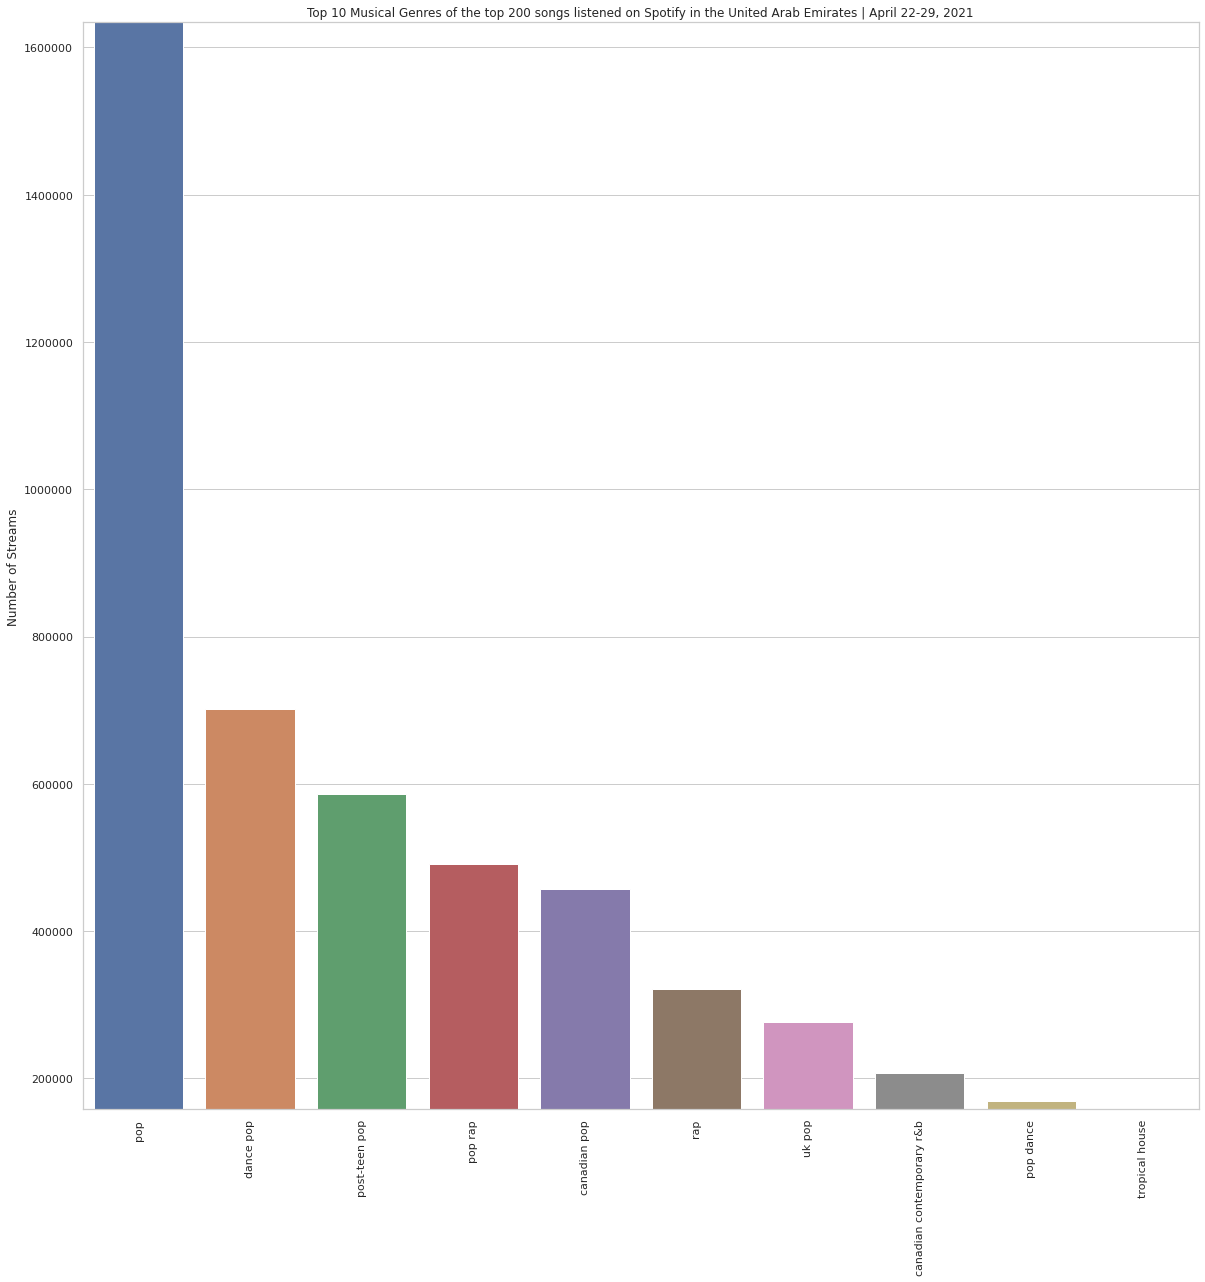

In [34]:

a4_dims = (20,20)
uae_music_genres_categories_pd = uae_music_genres_categories_pd.head(10)
smallest_count = uae_music_genres_categories_pd.nsmallest(1, 'Number of Streams')['Number of Streams'].values[0]
largest_count = uae_music_genres_categories_pd.nlargest(1, 'Number of Streams')['Number of Streams'].values[0]
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(ylim=(smallest_count,largest_count))
ax.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")
plot1 = sns.barplot(ax=ax,x=uae_music_genres_categories_pd.index, y=uae_music_genres_categories_pd['Number of Streams'])
plt.xticks(rotation=90)
plt.title('Top 10 Musical Genres of the top 200 songs listened on Spotify in the United Arab Emirates | April 22-29, 2021')
plt.savefig("uae_10_genres.png")

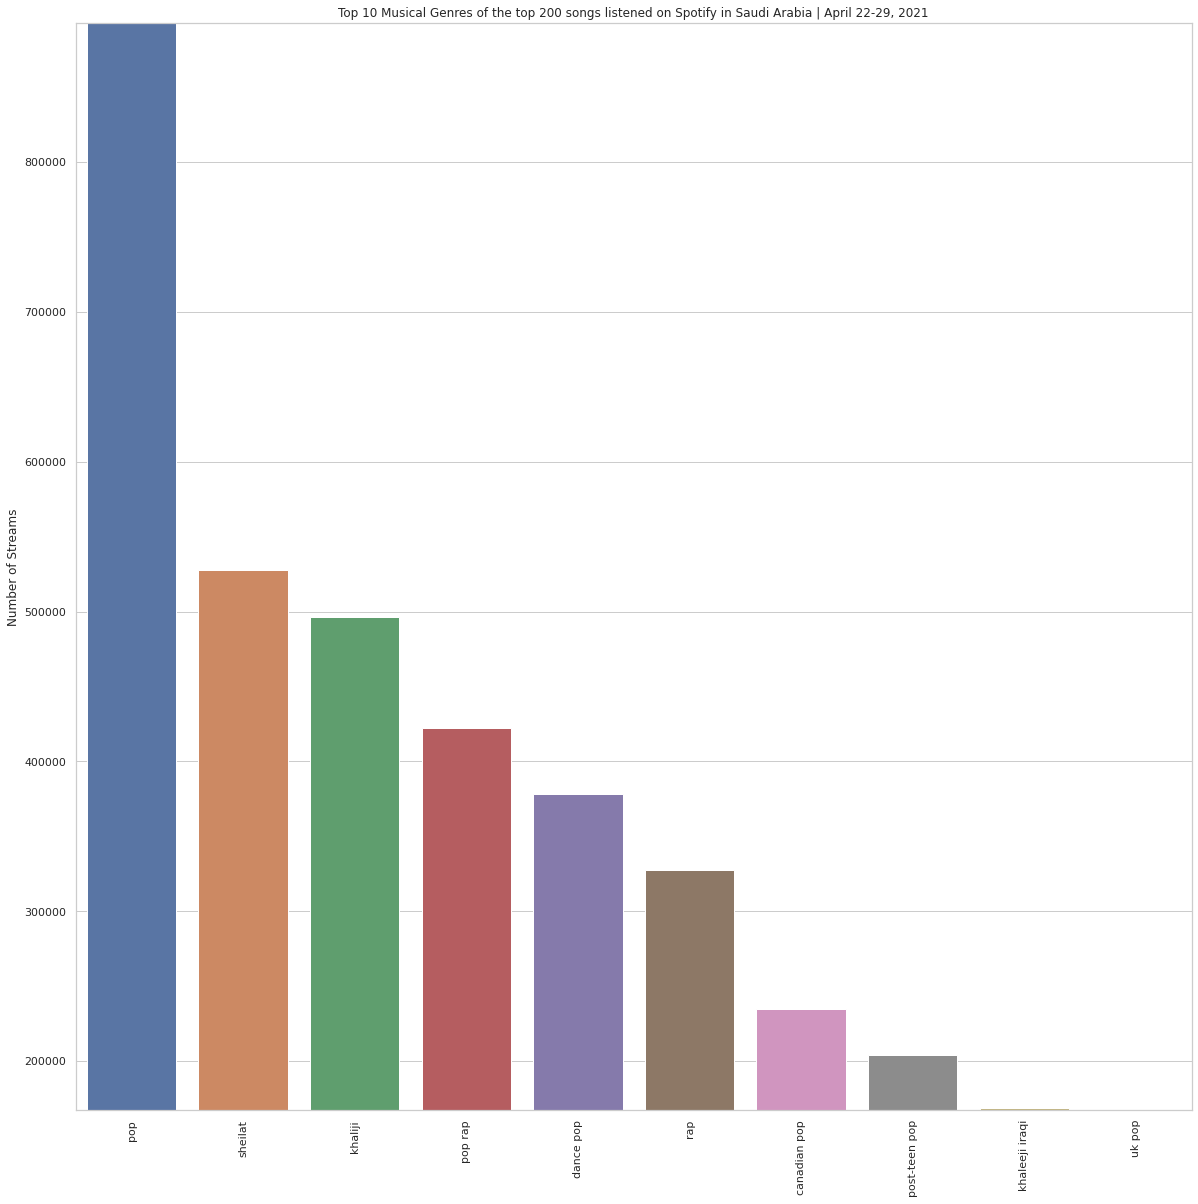

In [35]:
sa_music_genres_categories_pd = sa_music_genres_categories_pd.head(10)
smallest_count = sa_music_genres_categories_pd.nsmallest(1, 'Number of Streams')['Number of Streams'].values[0]
largest_count = sa_music_genres_categories_pd.nlargest(1, 'Number of Streams')['Number of Streams'].values[0]
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(ylim=(smallest_count,largest_count))
ax.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")
plot2 = sns.barplot(ax=ax,x=sa_music_genres_categories_pd.index, y=sa_music_genres_categories_pd['Number of Streams'])
plt.xticks(rotation=90)
plt.title('Top 10 Musical Genres of the top 200 songs listened on Spotify in Saudi Arabia | April 22-29, 2021')
plt.savefig("sa_10_genres.png")

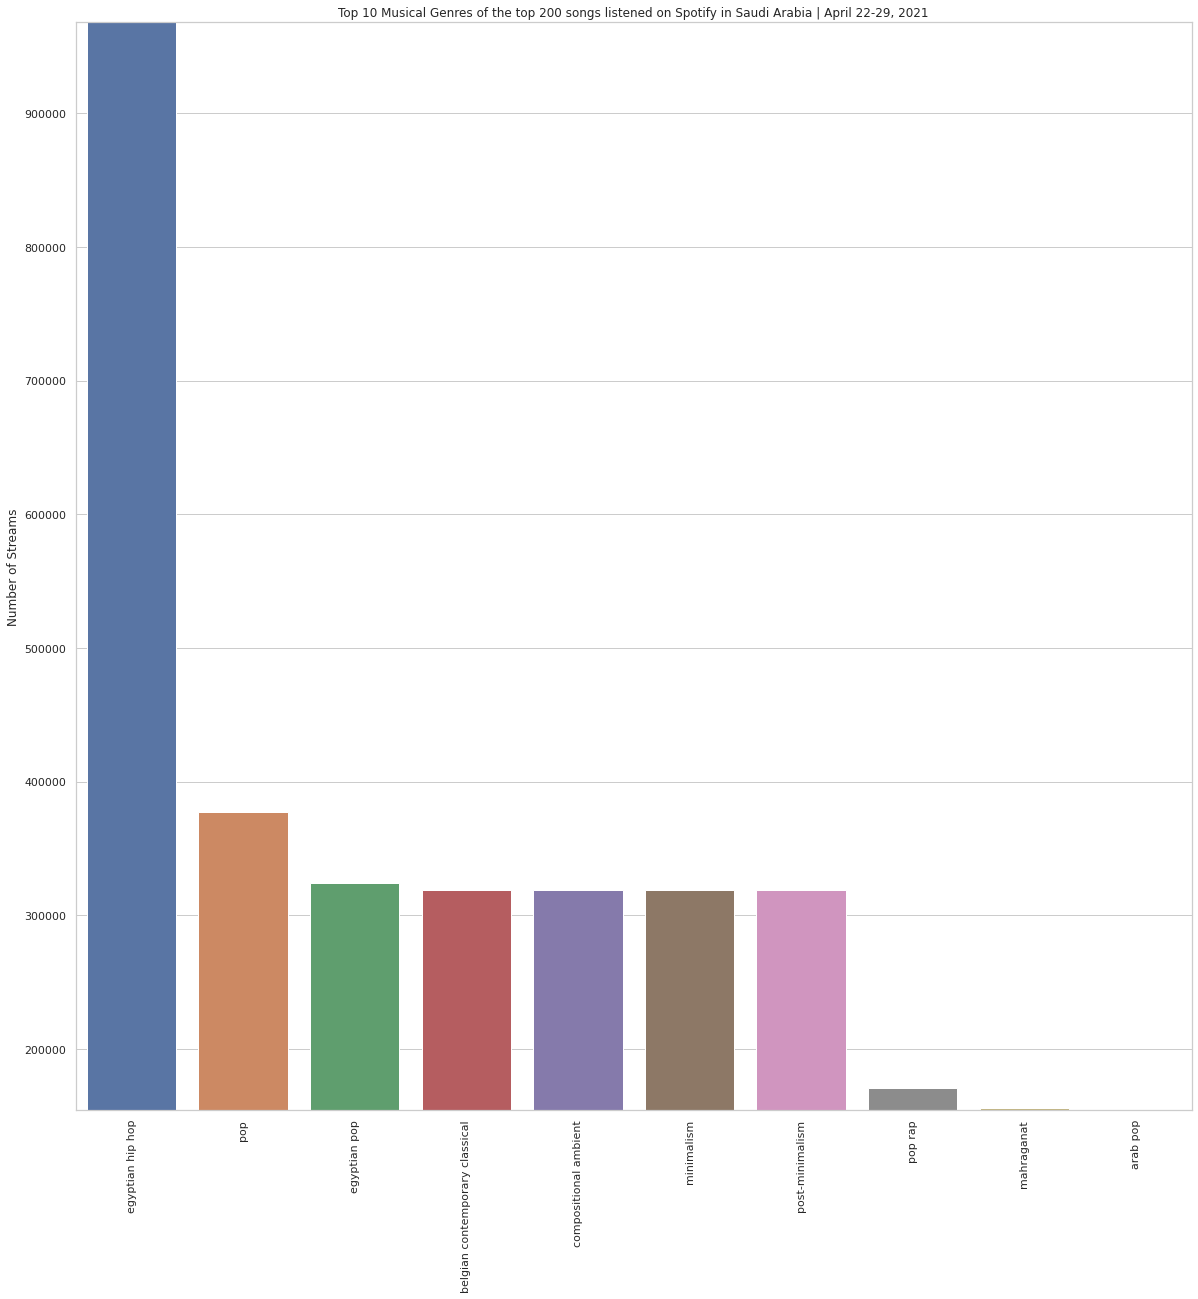

In [36]:
eg_music_genres_categories_pd = eg_music_genres_categories_pd.head(10)
smallest_count = eg_music_genres_categories_pd.nsmallest(1, 'Number of Streams')['Number of Streams'].values[0]
largest_count = eg_music_genres_categories_pd.nlargest(1, 'Number of Streams')['Number of Streams'].values[0]
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(ylim=(smallest_count,largest_count))
ax.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")
plot2 = sns.barplot(ax=ax,x=eg_music_genres_categories_pd.index, y=eg_music_genres_categories_pd['Number of Streams'])
plt.xticks(rotation=90)
plt.title('Top 10 Musical Genres of the top 200 songs listened on Spotify in Saudi Arabia | April 22-29, 2021')
plt.savefig("eg_10_genres.png")

# Resources 
- https://github.com/esteveste/Spotify-Charts-Scraper
- https://levelup.gitconnected.com/extracting-and-analysing-spotify-tracks-with-python-d1466fc1dfee
- https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b
- https://towardsdatascience.com/country-wise-visual-analysis-of-music-taste-using-spotify-api-seaborn-in-python-77f5b749b421
- https://medium.com/swlh/analyzing-most-popular-spotify-artists-using-data-science-814f26465370
- https://betterprogramming.pub/how-to-extract-any-artists-data-using-spotify-s-api-python-and-spotipy-4c079401bc37
